In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql
from astropy.time import Time
from astroquery.jplsbdb import SBDB
from precovery.orbit import Orbit
from precovery.orbit import EpochTimescale

In [3]:
import os
import sqlite3 as sql
import pandas as pd
import glob
import numpy as np
import multiprocessing
from astropy import units as u

In [ ]:
orbits = pd.read_csv("sbdb_query_results.csv",low_memory=False, float_precision = "round_trip" )

In [4]:
f = sorted(glob.glob(os.path.join("sbdb", "*.csv")))
dfs = []
for i in f:
    df = pd.read_csv(i)
    df["file_name"] = i
    dfs.append(df)
obs = pd.concat(dfs,ignore_index = True)

In [5]:
obs

Unnamed: 0           mjd      ra_deg    dec_deg  ra_sigma_arcsec  \
0             0  57998.588484   20.725915 -23.690765            0.036   
1             0  56952.447731  339.614127  -5.603111            0.295   
2             1  56952.449120  339.613963  -5.603193            0.295   
3             0  57448.710185  184.737125   0.769625            0.036   
4             1  57452.611678  183.902368   1.017835            0.036   
..          ...           ...         ...        ...              ...   
428           3  57806.554479  158.096316 -34.963098            0.994   
429           0  57180.553866  244.185668  -3.279828            0.036   
430           0  57998.678102    7.541921  -1.403778            0.207   
431           1  57998.679491    7.541806  -1.403671            0.207   
432           0  57865.422083  122.693191  -7.130064            0.036   

     dec_sigma_arcsec        mag  mag_sigma filter obscode  ...  pred_ra_deg  \
0               0.036  19.190742     0.0637      i     Q55  ...    20.725951   
1               0.148  21.208385     0.0157      g     Q55  ...   339.614139   
2               0.148  20.669884     0.0152      r     Q55  ...   339.613974   
3               0.036  20.767374     0.0300      r     Q55  ...   184.737058   
4               0.036  20.589005     0.0341      r     Q55  ...   183.902304   
..                ...        ...        ...    ...     ...  ...          ...   
428             0.053  18.635931     0.0202      z     Q55  ...   158.096226   
429             0.036  19.738655     0.0517      i     Q55  ...   244.185681   
430             0.193  16.575850     0.0047      i     Q55  ...     7.541927   
431             0.193  16.595226     0.0063      z     Q55  ...     7.541821   
432             0.036  20.594180     0.0252      g     Q55  ...   122.693196   

     pred_dec_deg  pred_vra_degpday  pred_vdec_degpday delta_ra_arcsec  \
0      -23.690807         -0.174324          -0.450920        0.129871   
1       -5.603158         -0.119139          -0.048331        0.041539   
2       -5.603225         -0.119121          -0.048314        0.037665   
3        0.769609         -0.212742           0.060179       -0.240953   
4        1.017832         -0.235439           0.066794       -0.233269   
..            ...               ...                ...             ...   
428    -34.963103         -0.505697           0.007458       -0.323429   
429     -3.279934         -0.345690           0.083315        0.043811   
430     -1.403837         -0.075993           0.071733        0.021325   
431     -1.403737         -0.075958           0.071737        0.054735   
432     -7.130147          0.637261          -0.317585        0.018486   

     delta_dec_arcsec  distance_arcsec     dataset_id  orbit_id  \
0           -0.150583         0.191882  SKYMAPPER_DR2    105140   
1           -0.170088         0.175040  SKYMAPPER_DR2     11283   
2           -0.115090         0.121041  SKYMAPPER_DR2     11283   
3           -0.058171         0.247854  SKYMAPPER_DR2    127908   
4           -0.008403         0.233384  SKYMAPPER_DR2    127908   
..                ...              ...            ...       ...   
428         -0.019048         0.265741  SKYMAPPER_DR2     87023   
429         -0.381024         0.383527  SKYMAPPER_DR2     90372   
430         -0.211758         0.212828  SKYMAPPER_DR2     96630   
431         -0.238638         0.244831  SKYMAPPER_DR2     96630   
432         -0.296247         0.296814  SKYMAPPER_DR2     97724   

           file_name  
0    sbdb/105140.csv  
1     sbdb/11283.csv  
2     sbdb/11283.csv  
3    sbdb/127908.csv  
4    sbdb/127908.csv  
..               ...  
428   sbdb/87023.csv  
429   sbdb/90372.csv  
430   sbdb/96630.csv  
431   sbdb/96630.csv  
432   sbdb/97724.csv  

[433 rows x 26 columns]

Text(0, 0.5, 'delta_dec')

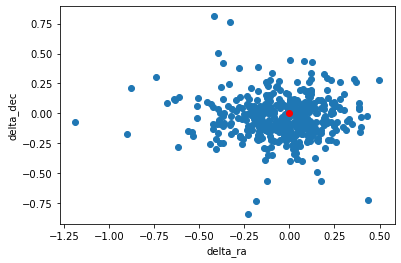

In [18]:
import matplotlib.pyplot as plt
plt.plot(obs["delta_ra_arcsec"],obs["delta_dec_arcsec"],"o")
plt.plot(0,0,"ro")
plt.xlabel("delta_ra")
plt.ylabel("delta_dec")

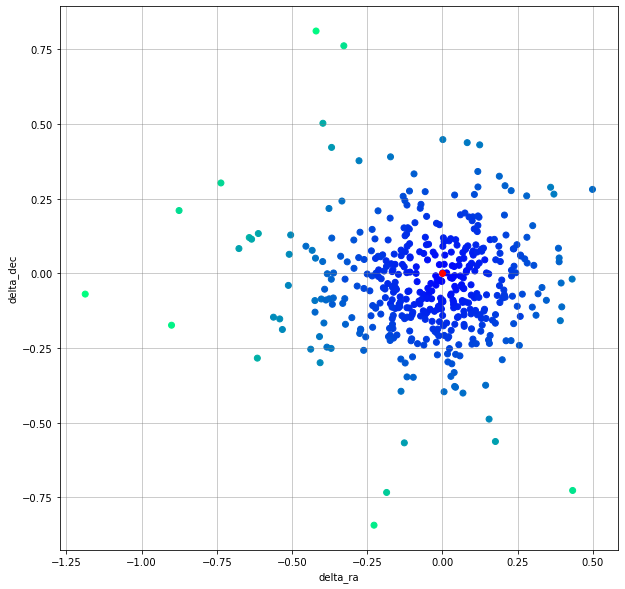

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(data=obs, x='delta_ra_arcsec', y='delta_dec_arcsec', c='distance_arcsec', cmap='winter')
ax.set( xlabel='delta_ra', ylabel='delta_dec')
ax.xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
ax.yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)

plt.plot(0,0,"ro")
plt.show()

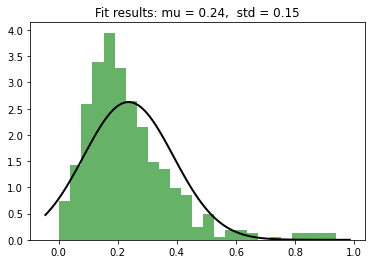

In [38]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
mu, std = norm.fit(obs["distance_arcsec"])

# Plot the histogram.
plt.hist(obs["distance_arcsec"], bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [ ]:
obs = obs.astype({"exposure_id": str}, errors='raise') 
run_cutouts_from_precovery(obs, pathlib.Path("result"),"cutout.png")

In [3]:
from PIL import Image
im = Image.open(r"result/cutout.png")
im